In [1]:
import pandas as pd
import requests
import zipfile
import io
import os
import csv
import ctypes as ct
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re


In [2]:
# source_file = "https://escoe-website.s3.amazonaws.com/wp-content/uploads/2018/10/08164544/BGSCSV.zip"
# r = requests.get(source_file)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# z.extractall("downloads/")
# os.listdir("downloads/")



In [3]:
from bgs.load_bgs_amounts import load_bgs_amounts

In [4]:
tables = load_bgs_amounts("downloads/BGSAmounts.csv")

In [5]:
tables.keys()

dict_keys(['Conventionals', 'Sum of Conventionals', 'Index-linked Old-style', 'Index-linked New-style', 'Calculated indexed nominal Old-style', 'Calculated indexed nominal New-style', 'Sum of total conventional and indexed-linked'])

In [6]:
conv = tables['Conventionals']

In [7]:
conv.shape

(734, 430)

In [8]:
conv.head()

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
Mar 1964,505,274,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
Apr 1964,505,274,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
May 1964,Redeemed,Redeemed,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
Jun 1964,,,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
Jul 1964,,,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482


In [9]:
conv.replace("Redeemed", "", inplace=True)
conv = conv.apply(pd.to_numeric, errors='coerce')
conv.fillna(0, inplace=True)


In [10]:
conv.head()

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
Mar 1964,505.0,274.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
Apr 1964,505.0,274.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
May 1964,0.0,0.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
Jun 1964,0.0,0.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
Jul 1964,0.0,0.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0


In [11]:
conv.sum(axis=1).head()

Mar 1964    19070.0
Apr 1964    19070.0
May 1964    18691.0
Jun 1964    18691.0
Jul 1964    18691.0
dtype: float64

In [12]:
sum_conv = tables["Sum of Conventionals"]
sum_conv.head()

,index,Sum of Conventionals
0,Mar 1964,"19,070.000"
1,Apr 1964,"19,070.000"
2,May 1964,"18,691.000"
3,Jun 1964,"18,691.000"
4,Jul 1964,"18,691.000"


In [13]:
from bgs.load_bgs_prices import load_prices
price_df=load_prices("downloads/BGSPrices.csv")

In [14]:
price_df.head()

,100,200,300,400,500,600,700,800,900,1000,...,77000,77100,77200,77300,77400,77500,77600,77700,77800,77900
28 Nov 1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31 Dec 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30 Jan 1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27 Feb 1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31 Mar 1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
price_df.tail(20)

,100,200,300,400,500,600,700,800,900,1000,...,77000,77100,77200,77300,77400,77500,77600,77700,77800,77900
29 Sep 2023,0,0,0,0,0,0,0,0,0,0,...,25.244692,24.690908,24.154637,23.635198,23.131944,22.64426,22.171562,21.713299,21.268945,21.268945
31 Oct 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.647448,24.098242,23.56622,23.050711,22.551081,22.066727,21.597084,21.141614,20.69981,20.69981
30 Nov 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.884572,26.324784,25.782317,25.256516,24.74676,24.252465,23.773075,23.308066,22.856938,22.856938
29 Dec 2023,0,0,0,0,0,0,0,0,0,0,...,31.189534,30.608365,30.042641,29.491791,28.955302,28.432708,27.923591,27.427573,26.944312,26.944312
31 Jan 2024,0,0,0,0,0,0,0,0,0,0,...,28.378672,27.78428,27.207651,26.648185,26.10532,25.578527,25.067306,24.571177,24.089683,24.089683
29 Feb 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.069882,27.477846,26.903438,26.346078,25.80522,25.280346,24.770964,24.276599,23.796796,23.796796
28 Mar 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.19021,28.585522,27.997813,27.426546,26.871231,26.331413,25.806668,25.2966,24.800829,24.800829
30 Apr 2024,0,0,0,0,0,0,0,0,0,0,...,26.478775,25.889213,25.318019,24.764595,24.228376,23.708818,23.205402,22.717623,22.244995,22.244995
31 May 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.928706,26.328084,25.745998,25.181868,24.635142,24.105291,23.591805,23.094189,22.611962,22.611962
28 Jun 2024,0,0,0,0,0,0,0,0,0,0,...,27.611761,27.006116,26.418968,25.849718,25.297805,24.762694,24.243875,23.740857,23.253169,23.253169


In [16]:
price_df.index[0]

'28 Nov 1975'

In [17]:
c = pd.Series(pd.to_datetime(price_df.index, format="%d %b %Y")).dt.strftime("%b %Y").values
c[:10]

array(['Nov 1975', 'Dec 1975', 'Jan 1976', 'Feb 1976', 'Mar 1976',
       'Apr 1976', 'May 1976', 'Jun 1976', 'Jul 1976', 'Aug 1976'],
      dtype=object)

In [18]:
c[0]

'Nov 1975'

In [19]:
conv[conv.index==c[0]]

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
Nov 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,365.0,1909.0,292.0,58.0,2.0,21.0,276.0,482.0


In [20]:
price_df[32300]

28 Nov 1975    27.6875
31 Dec 1975     26.375
30 Jan 1976       29.5
27 Feb 1976    28.9375
31 Mar 1976      28.75
                ...   
31 Dec 2024          0
31 Jan 2025          0
28 Feb 2025        0.0
31 Mar 2025        0.0
30 Apr 2025        0.0
Name: 32300, Length: 594, dtype: object

In [21]:
price_df.index = pd.to_datetime(price_df.index, format="%d %b %Y").to_period('M').to_timestamp('M')

In [22]:
price_df.columns = price_df.columns.map(str)
price_df['3500']

1975-11-30    98.78125
1975-12-31       99.29
1976-01-31       99.75
1976-02-29     missing
1976-03-31    Redeemed
                ...   
2024-12-31           0
2025-01-31           0
2025-02-28         0.0
2025-03-31         0.0
2025-04-30         0.0
Freq: ME, Name: 3500, Length: 594, dtype: object

In [23]:
price_strings = np.where(price_df.map(lambda x: type(x)==str))
price_strings

(array([  0,   0,   3, ..., 586, 589, 590], shape=(2111,)),
 array([ 50,  59,  34, ..., 617, 618, 354], shape=(2111,)))

In [24]:
c = Counter()
for i, x in enumerate(price_strings[0]):
    c[price_df.loc[price_df.index[x],price_df.columns[price_strings[1][i]]]]+=1
c.most_common(10)

[('missing', 1654), ('Redeemed', 383), ('Amalgamated', 72), ('redeemed', 2)]

In [25]:
c.keys()

dict_keys(['missing', 'Amalgamated', 'Redeemed', 'redeemed'])

In [26]:
for text in ['Amalgamated', 'Redeemed', 'redeemed']:
    price_df = price_df.replace(text, None)
price_df = price_df.fillna(0)
price_df = price_df.replace('missing', None)
price_df = price_df.ffill(axis=0)

/tmp/ipykernel_6101/1913237909.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_df = price_df.fillna(0)
/tmp/ipykernel_6101/1913237909.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_df = price_df.ffill(axis=0)


In [27]:
conv.columns

Index(['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000',
       ...
       '32295', '32297', '32300', '32400', '32500', '32600', '32700', '32800',
       '32900', '33000'],
      dtype='object', length=430)

In [28]:
not_in_conventionals = set(price_df.columns.astype(str)) - set(conv.columns)

In [29]:
from bgs.load_gilt_details import load_csv_blocks
details = load_csv_blocks("downloads/BGSDetails.csv")

In [30]:
details['Conventionals'].head()

,Sequence,Inst Code,Sedol,ISIN Code,%,Stock,Suffix,Special features,First year,Last year,...,Col for I-L 5,Number of calls,Call payment 1,due on 1,Call payment 2,due on 2,Call payment 3,due on 3,Call payment 4,due on 4
0,100,4HCV64,,,4.5,Conversion,,,,1964,...,,,,,,,,,,
1,200,2HEX6364,,,2.5,Exchequer,,,1963,1964,...,,,,,,,,,,
2,300,4TY65,,,4,Treasury,,,,1965,...,,,,,,,,,,
3,400,3SB5565,,,3,Savings bonds,,,1955,1965,...,,,,,,,,,,
4,500,5HEX66,,,5.5,Exchequer,,,,1966,...,,,,,,,,,,


In [31]:
details['Index-Linked Old-style'].head()

,Sequence,Inst Code,Sedol,ISIN Code,%,Stock,Suffix,Special features,First year,Last year,...,Number of calls,Call payment 1,due on 1,Call payment 2,due on 2,Call payment 3,due on 3,Call payment 4,due on 4,
0,50000,2IL88,,,2,Index-linked,,,,1988,...,2,50,19 Mar 1982,47.5,29 Apr 1982,,,,,
1,50100,2IL90,,,2,Index-linked,,,,1990,...,,,,,,,,,,
2,50200,2IL92,,,2,Index-linked,,,,1992,...,,,,,,,,,,
3,50300,2IL94,,,2,Index-linked,,,,1994,...,2,40,2 Jun 1988,55.25,18 Jul 1988,,,,,
4,50400,2IL96,,GB0009056556,2,Index-linked,,,,1996,...,3,35,27 Mar 1981,30,1 May 1981,35,26 May 1981,,,


In [32]:
details['Index-Linked New-style'].head()

,Sequence,Inst Code,Sedol,ISIN Code,%,Stock,Suffix,Special features,First year,Last year,...,Number of calls,Call payment 1,due on 1,Call payment 2,due on 2,Call payment 3,due on 3,Call payment 4,due on 4,
0,55200,1QIL17,B0V3WQ7,GB00B0V3WQ75,1.25,Index-linked,,,,2017,...,,,,,,,,,,
1,55230,0AIL19,BBDR7T2,GB00BBDR7T29,0.125,Index-linked,,,,2019,...,,,,,,,,,,
2,55250,1DIL22,B1Z5HQ1,GB00B1Z5HQ14,1.875,Index-linked,,,,2022,...,,,,,,,,,,
3,55270,0AIL24,B85SFQ5,GB00B85SFQ54,0.125,Index-linked,,,,2024,...,,,,,,,,,,
4,55280,0AIL26,BYY5F14,GB00BYY5F144,0.125,Index-linked,,,,2026,...,,,,,,,,,,


In [33]:
details['Conventionals']['Earliest redemption date']

0                 
1      14 May 1963
2                 
3      15 Aug 1955
4                 
          ...     
420               
421               
422     1 Feb 1957
423     1 Dec 1952
424     1 Apr 1961
Name: Earliest redemption date, Length: 425, dtype: object

In [34]:
details['Conventionals']['Latest redemption date']

0      14 May 1964
1      14 May 1964
2       1 Feb 1965
3      15 Aug 1965
4      15 Mar 1966
          ...     
420    22 Oct 2071
421    22 Oct 2073
422               
423               
424               
Name: Latest redemption date, Length: 425, dtype: object

In [35]:
details['Index-Linked Old-style'].index

RangeIndex(start=0, stop=20, step=1)

In [36]:
(set(details['Index-Linked Old-style'].index) | set(details['Index-Linked New-style'].index)) - not_in_conventionals

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35}

In [37]:
def clean_date(bgs_index):
    if re.match(r'^\d{2}\s\w{3}\s+\d{4}$', bgs_index):
        return pd.to_datetime(bgs_index, format="%d %b %Y", errors='coerce').to_period('M').to_timestamp('M')
    else:
        return pd.to_datetime(bgs_index).to_period('M').to_timestamp('M')

conv.index = pd.Index([clean_date(x) for x in list(conv.index)])

In [38]:
re.match(r'^\d{2}\s\w{3}\s+\d{4}$','30 Apr 2024')

<re.Match object; span=(0, 11), match='30 Apr 2024'>

In [39]:
mtm_list = []

for bgs_gilt_id in conv.columns:
    # print(bgs_gilt_id)
    calc_df = pd.DataFrame(index=price_df.index, columns=['amounts','prices'])
    calc_df = pd.concat([conv[bgs_gilt_id],price_df[bgs_gilt_id]], join='inner', axis=1, keys=['amounts','prices'])
    calc_df['mtm'] = calc_df['amounts']*calc_df['prices']/100
    mtm_list.append(calc_df['mtm'].rename(bgs_gilt_id).copy())
#mtm_df[bgs_gilt_id] = calc_df['amounts']*calc_df['prices']
#mtm_list.append(mtm_df)
conv_mtm_df = pd.concat(mtm_list, axis=1)


In [40]:
conv_mtm_df.index

DatetimeIndex(['1975-11-30', '1975-12-31', '1976-01-31', '1976-02-29',
               '1976-03-31', '1976-04-30', '1976-05-31', '1976-06-30',
               '1976-07-31', '1976-08-31',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', length=594, freq='ME')

In [41]:
conv_mtm_df.sum(axis=1)

1975-11-30    2.328926e+04
1975-12-31    2.509547e+04
1976-01-31    2.762346e+04
1976-02-29    2.822836e+04
1976-03-31    2.736702e+04
                  ...     
2024-12-31    1.663885e+06
2025-01-31    1.664482e+06
2025-02-28    1.701624e+06
2025-03-31    1.664187e+06
2025-04-30    1.726765e+06
Freq: ME, Length: 594, dtype: float64

In [42]:
conv.index

DatetimeIndex(['1964-03-31', '1964-04-30', '1964-05-31', '1964-06-30',
               '1964-07-31', '1964-08-31', '1964-09-30', '1964-10-31',
               '1964-11-30', '1964-12-31',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', length=734, freq=None)

In [43]:
conv.loc['Dec 2024']

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
2024-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24406.323,10968.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

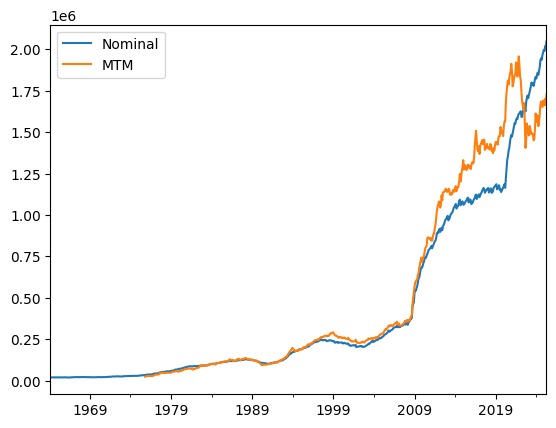

In [44]:
conventionals = pd.DataFrame()
conventionals['Nominal'] = conv.sum(axis=1)
conventionals['MTM'] = conv_mtm_df.sum(axis=1)
conventionals.index = pd.to_datetime(conventionals.index, format="%b %Y").to_period('M').to_timestamp('M')
conventionals.plot()
# fig = plt.figure(figsize=(12, 6))
# ax = fig.add_subplot(111)
# ax.set_title("BGS MTM")
# ax.set_xlabel("Date")
# ax.set_ylabel("MTM")
# conv.sum(axis=1).plot(ax=ax, label='Conv')
# mtm_df.sum(axis=1).plot(ax=ax, label='MTM')
# ax.legend()

<Axes: >

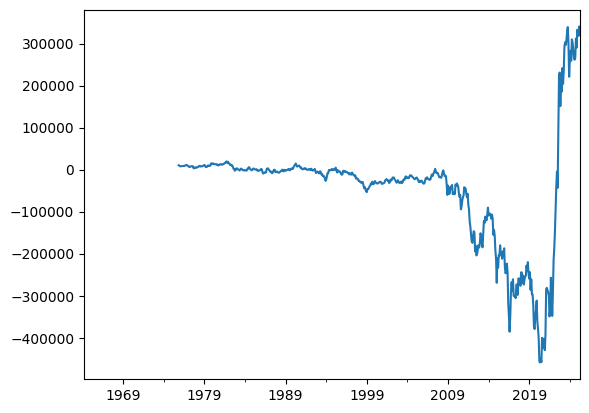

In [45]:
(conventionals['Nominal'] - conventionals['MTM']).plot()

<Axes: >

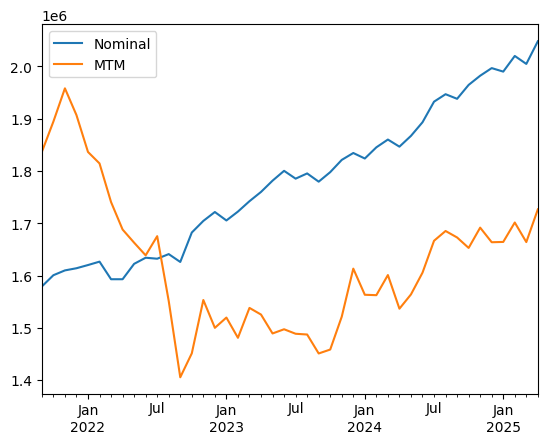

In [46]:
conventionals['2021-09-01':].plot()

In [47]:
old = tables['Calculated indexed nominal Old-style']

old.replace("Redeemed", "", inplace=True)
old = old.apply(pd.to_numeric, errors='coerce')
old.fillna(0, inplace=True)

In [48]:
old.index = pd.Index([clean_date(x) for x in list(old.index)]).to_period('M').to_timestamp('M')

In [49]:
for bgs_gilt_id in old.columns:
    # print(bgs_gilt_id)
    calc_df = pd.DataFrame(index=price_df.index, columns=['amounts','prices'])
    calc_df = pd.concat([old[bgs_gilt_id],price_df[bgs_gilt_id]], join='inner', axis=1, keys=['amounts','prices'])
    calc_df['mtm'] = calc_df['amounts']*calc_df['prices']/100
    mtm_list.append(calc_df['mtm'].rename(bgs_gilt_id).copy())

In [50]:
new = tables['Calculated indexed nominal New-style']
new.head()

,55200,55230,55250,55270,55280,55300,55310,55320,55340,55350,...,55475,55480,55485,55500,55525,55550,55600,55650,55700,55800
Mar 1964,,,,,,,,,,,...,,,,,,,,,,
Apr 1964,,,,,,,,,,,...,,,,,,,,,,
May 1964,,,,,,,,,,,...,,,,,,,,,,
Jun 1964,,,,,,,,,,,...,,,,,,,,,,
Jul 1964,,,,,,,,,,,...,,,,,,,,,,


In [51]:
new.replace("Redeemed", "", inplace=True)
new = new.apply(pd.to_numeric, errors='coerce')
new.fillna(0, inplace=True)

new.index = pd.Index([clean_date(x) for x in list(new.index)])

for bgs_gilt_id in new.columns:
    # print(bgs_gilt_id)
    calc_df = pd.DataFrame(index=price_df.index, columns=['amounts','prices'])
    calc_df = pd.concat([new[bgs_gilt_id],price_df[bgs_gilt_id]], join='inner', axis=1, keys=['amounts','prices'])
    calc_df['mtm'] = calc_df['amounts']*calc_df['prices']/100
    mtm_list.append(calc_df['mtm'].rename(bgs_gilt_id).copy())

In [52]:
new.head()

,55200,55230,55250,55270,55280,55300,55310,55320,55340,55350,...,55475,55480,55485,55500,55525,55550,55600,55650,55700,55800
1964-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
total_gilts_mtm = pd.concat(mtm_list, axis=1)

total_gilts = pd.DataFrame()
total_gilts['MTM'] = total_gilts_mtm.sum(axis=1)
total_gilts.index = pd.to_datetime(total_gilts.index, format="%b %Y").to_period('M').to_timestamp('M')


<Axes: >

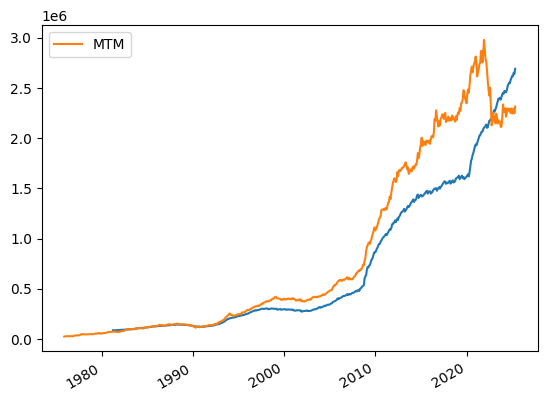

In [54]:
total_nominal = tables['Sum of total conventional and indexed-linked'].reset_index().set_index('index')
total_nominal = total_nominal.drop_duplicates()
total_nominal.index = pd.Index([clean_date(x) for x in list(total_nominal.index)])

total_nominal['Sum of total conventional and indexed-linked'] = pd.to_numeric(total_nominal['Sum of total conventional and indexed-linked'])
ax = total_nominal['Sum of total conventional and indexed-linked'].plot()
total_gilts.plot(ax = ax)

In [90]:
total_gilts_mtm.columns

Index(['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000',
       ...
       '55475', '55480', '55485', '55500', '55525', '55550', '55600', '55650',
       '55700', '55800'],
      dtype='object', length=486)

In [55]:
total_nominal.head()

,Sum of total conventional and indexed-linked
1964-03-31,NaN
1981-03-31,86512.0
1981-04-30,86655.0
1981-05-31,87412.0
1981-06-30,86518.0


In [56]:
total_nominal.drop_duplicates().index

DatetimeIndex(['1964-03-31', '1981-03-31', '1981-04-30', '1981-05-31',
               '1981-06-30', '1981-07-31', '1981-08-31', '1981-09-30',
               '1981-10-31', '1981-11-30',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', length=530, freq=None)

In [57]:
total_nominal.head()

,Sum of total conventional and indexed-linked
1964-03-31,NaN
1981-03-31,86512.0
1981-04-30,86655.0
1981-05-31,87412.0
1981-06-30,86518.0


In [58]:
total_nominal['Sum of total conventional and indexed-linked']

1964-03-31          NaN
1981-03-31      86512.0
1981-04-30      86655.0
1981-05-31      87412.0
1981-06-30      86518.0
                ...    
2024-12-31    2620691.0
2025-01-31    2617256.0
2025-02-28    2651899.0
2025-03-31    2641129.0
2025-04-30    2691295.0
Name: Sum of total conventional and indexed-linked, Length: 530, dtype: float64

In [59]:
total_gilts

,MTM
1975-11-30,2.328926e+04
1975-12-31,2.509547e+04
1976-01-31,2.762346e+04
1976-02-29,2.822836e+04
1976-03-31,2.736702e+04
...,...
2024-12-31,2.245898e+06
2025-01-31,2.256886e+06
2025-02-28,2.293192e+06
2025-03-31,2.248394e+06


In [60]:
total_nominal['Sum of total conventional and indexed-linked'] - total_gilts['MTM']

1964-03-31              NaN
1975-11-30              NaN
1975-12-31              NaN
1976-01-31              NaN
1976-02-29              NaN
                  ...      
2024-12-31    374792.909174
2025-01-31    360369.565368
2025-02-28    358706.853427
2025-03-31    392734.584955
2025-04-30    376325.856982
Length: 595, dtype: float64

In [61]:
p_apr25 = price_df.loc['2025-04-30']
p_apr25

100       0.000
200       0.000
300       0.000
400       0.000
500       0.000
          ...  
77500    21.225
77600    20.698
77700    20.192
77800    19.705
77900    19.705
Name: 2025-04-30 00:00:00, Length: 728, dtype: float64

In [62]:
conv.loc['2025-04-30'].tail(20)

32267    28287.997
32268    32127.870
32269    25158.058
32270    28320.177
32275    31462.493
32280    25722.409
32282    26493.249
32283    17119.248
32285    21057.884
32290    21230.448
32295    24725.323
32297    11111.000
32300        0.000
32400        0.000
32500        0.000
32600        0.000
32700        0.000
32800        0.000
32900        0.000
33000        0.000
Name: 2025-04-30 00:00:00, dtype: float64

In [63]:
new.index

DatetimeIndex(['1964-03-31', '1964-04-30', '1964-05-31', '1964-06-30',
               '1964-07-31', '1964-08-31', '1964-09-30', '1964-10-31',
               '1964-11-30', '1964-12-31',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', length=734, freq=None)

In [64]:
old.index

DatetimeIndex(['1964-03-31', '1964-04-30', '1964-05-31', '1964-06-30',
               '1964-07-31', '1964-08-31', '1964-09-30', '1964-10-31',
               '1964-11-30', '1964-12-31',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', length=734, freq='ME')

In [65]:
details['Index-Linked New-style'].index

RangeIndex(start=0, stop=36, step=1)

In [66]:
disc_apr25 =  p_apr25.replace(0,None).map(lambda x: 100 - x if x and x < 100 else 0).fillna(0).T
disc_apr25

100       0.000
200       0.000
300       0.000
400       0.000
500       0.000
          ...  
77500    78.775
77600    79.302
77700    79.808
77800    80.295
77900    80.295
Name: 2025-04-30 00:00:00, Length: 728, dtype: float64

In [67]:
conv_discount = (conv.loc['2025-04-30'].T * disc_apr25)/100
conv_discount = conv_discount[conv_discount>0].reset_index().rename(columns={'index':'Sequence',pd.to_datetime('2025-04-30'):'Discount'})
conv_discount


,Sequence,Discount
0,32010,165.997088
1,32025,296.924487
2,32026,113.091326
3,32027,919.497996
4,32030,1127.565147
5,32035,1527.181331
6,32038,37.352749
7,32040,2107.458577
8,32060,2926.571773
9,32075,2483.448414


In [68]:
conv_details = details['Conventionals']


In [69]:
conv_details.loc[conv_details['Sequence']=='32295'].T

,420
Sequence,32295
Inst Code,1CTG71
Sedol,BFMCN65
ISIN Code,GB00BFMCN652
%,1.625
Stock,Treasury gilt
Suffix,
Special features,
First year,
Last year,2071


In [70]:
disc_apr25['32295']

np.float64(57.92)

In [71]:
conv.loc['Apr 2025']['32295']

2025-04-30    24725.323
Name: 32295, dtype: float64

In [72]:
conv_dis = conv_discount.merge(conv_details[['Sequence','%','Latest redemption date', 'Issue date']], left_on='Sequence', right_on='Sequence')

In [73]:
conv_dis['%'].value_counts()

%
4.25     7
3.5      3
0.625    3
3.75     3
0.875    3
1.25     3
1.5      3
1.75     3
4        3
1.625    3
0.125    2
1.125    2
0.375    2
0.5      2
3.25     2
4.375    2
2        1
1        1
0.25     1
3 3/4    1
4.5      1
4.75     1
2.5      1
Name: count, dtype: int64

In [74]:
def clean_percentage(x):
    try:
        x = float(x)
    except (ValueError, TypeError):
        units, fractions = x.split(' ')
        num, denom = map(float, fractions.split('/'))
        x = float(units) + num / denom
    return x

conv_dis['%'] = conv_dis['%'].apply(clean_percentage).astype(float)

<Axes: xlabel='%'>

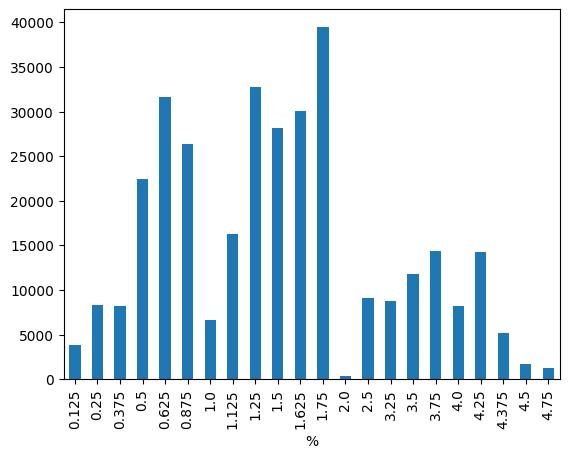

In [75]:
conv_dis.groupby('%')['Discount'].sum().plot(kind='bar')

<Axes: xlabel='%'>

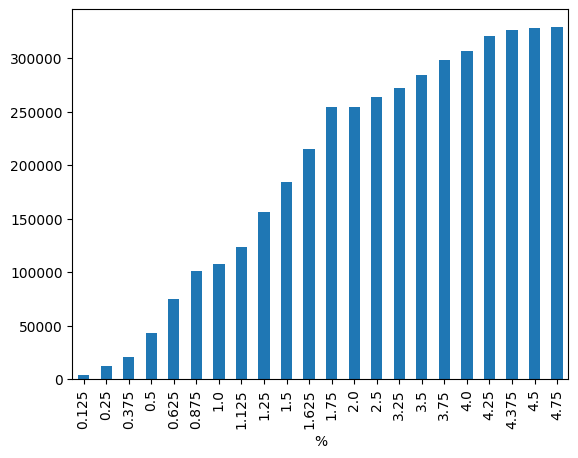

In [76]:
conv_dis.groupby('%')['Discount'].sum().cumsum().plot(kind='bar')

In [77]:
conv_dis.groupby('%')['Discount'].sum().sum()

np.float64(329231.2051195201)

In [78]:
new_discount = (new.loc['30 Apr 2025'] * disc_apr25)/100
new_discount = new_discount[new_discount>0].reset_index().rename(columns={'index':'Sequence',pd.to_datetime('2025-04-30'):'Discount'})
new_discount

,Sequence,Discount
0,55280,36.539662
1,55310,8.352069
2,55320,223.189800
3,55340,456.650124
4,55360,405.986712
5,55375,728.498400
6,55380,65.279500
7,55385,2747.449760
8,55400,883.250330
9,55405,3694.522260


<Axes: xlabel='%'>

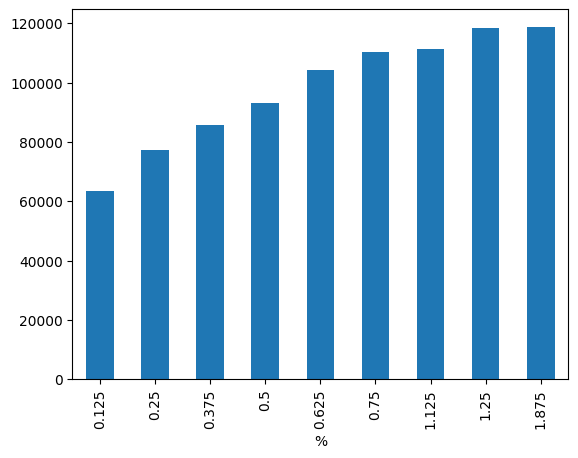

In [79]:
new_details = details['Index-Linked New-style']
new_dis = new_discount.merge(new_details[['Sequence','%','Latest redemption date', 'Issue date']], left_on='Sequence', right_on='Sequence')
new_dis['%'] = new_dis['%'].apply(clean_percentage).astype(float)
new_dis.groupby('%')['Discount'].sum().cumsum().plot(kind='bar')

In [80]:
old.tail()

,50000,50100,50200,50300,50400,50500,50600,50700,50800,50900,51000,51100,51200,51300,51400,51500,51600,51700,51800,51900
2024-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13796.3,20145.9
2025-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13846.4,20219.2
2025-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13878.7,20266.3
2025-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13885.9,20276.8
2025-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13971.9,20402.3


In [81]:
old_discount = (old.loc['Apr 2025'] * disc_apr25)/100
old_discount = old_discount[old_discount>0].reset_index().rename(columns={'index':'Sequence',0:'Discount'})
old_discount

,Sequence,100,1000,10000,10100,10200,10300,10400,10500,10600,...,9000,9100,9200,9300,9400,9500,9600,9700,9800,9900
0,2025-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
new_dis.groupby('%')['Discount'].sum().sum() + conv_dis.groupby('%')['Discount'].sum().sum()

np.float64(448005.66867652006)

In [83]:
conv_dis['Issue date'] = conv_dis['Issue date'].apply(clean_date).dt.year

<Axes: xlabel='Issue date'>

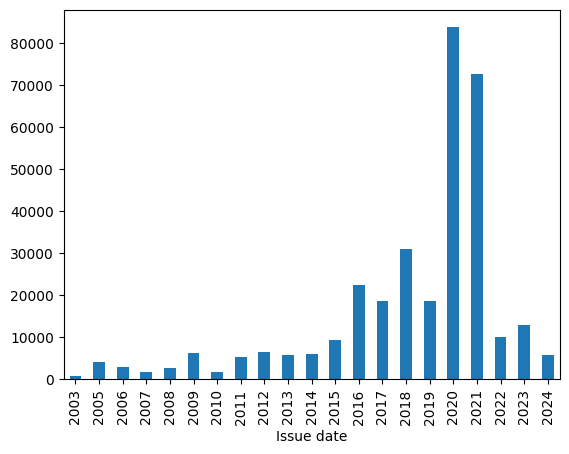

In [84]:
conv_dis.sort_values('Issue date').groupby('Issue date')['Discount'].sum().plot(kind='bar')

In [85]:
conv_dis['Latest redemption date'].to_list()

['7 Jun 2025',
 '7 Sep 2025',
 '22 Oct 2025',
 '30 Jan 2026',
 '22 Jul 2026',
 '22 Oct 2026',
 '7 Mar 2027',
 '22 Jul 2027',
 '31 Jan 2028',
 '22 Oct 2028',
 '31 Jan 2029',
 '22 Oct 2029',
 '22 Oct 2030',
 '31 Jul 2031',
 '22 Oct 2031',
 '31 Jan 2032',
 '31 Jan 2033',
 '31 Jul 2033',
 ' 31-Jul-2034',
 '31 Jul 2035',
 '7 Mar 2036',
 '7 Sep 2037',
 '29 Jan 2038',
 '31 Jan 2039',
 '7 Sep 2039',
 '31 Jan 2040',
 '7 Dec 2040',
 '22 Oct 2041',
 '7 Dec 2042',
 '22 Oct 2043',
 '22 Jan 2044',
 '22 Jan 2045',
 '31 Jan 2046',
 '7 Dec 2046',
 '22 Jul 2047',
 '22 Jan 2049',
 '7 Dec 2049',
 '22 Oct 2050',
 '31 Jul 2051',
 '22 Jul 2052',
 '31 Jul 2053',
 '22 Oct 2053',
 '31 Jul 2054',
 '22 Oct 2054',
 '7 Dec 2055',
 '22 Jul 2057',
 '22 Jan 2060',
 '22 Oct 2061',
 '22 Oct 2063',
 '22 Jul 2065',
 '22 Jul 2068',
 '22 Oct 2071',
 '22 Oct 2073']

<Axes: xlabel='Maturity date'>

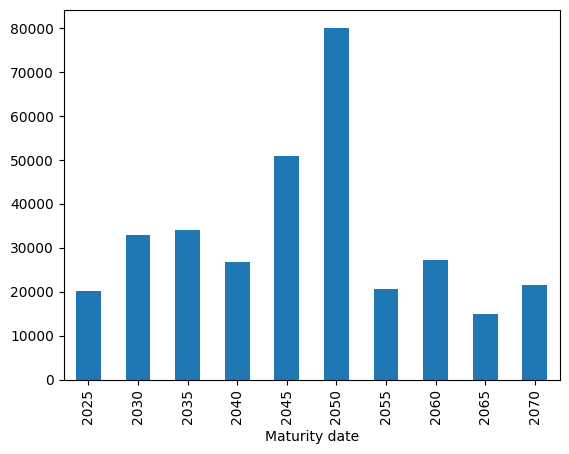

In [86]:
conv_dis['Maturity date'] = conv_dis['Latest redemption date'].apply(clean_date).dt.year//5 * 5
conv_dis.sort_values('Maturity date').groupby('Maturity date')['Discount'].sum().plot(kind='bar')


<Axes: xlabel='Issue date'>

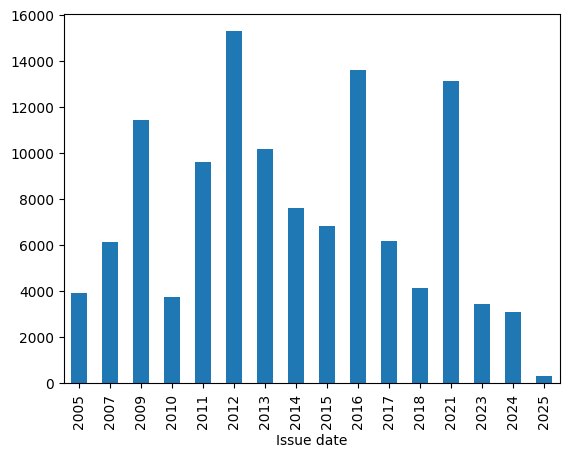

In [87]:
new_dis['Issue date'] = new_dis['Issue date'].apply(clean_date).dt.year
new_dis.sort_values('Issue date').groupby('Issue date')['Discount'].sum().plot(kind='bar')

<Axes: xlabel='Maturity date'>

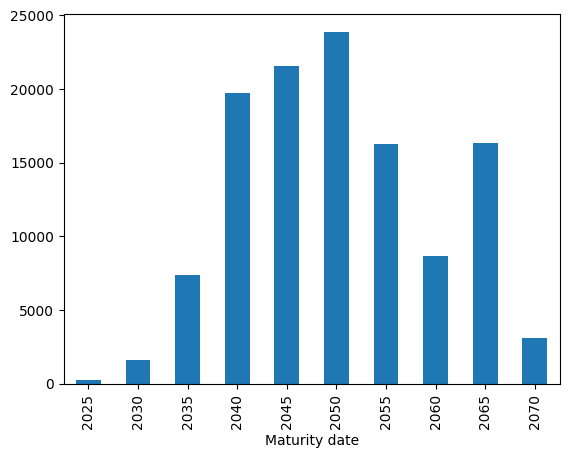

In [88]:
new_dis['Maturity date'] = new_dis['Latest redemption date'].apply(clean_date).dt.year//5 * 5
new_dis.sort_values('Maturity date').groupby('Maturity date')['Discount'].sum().plot(kind='bar')